##Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [6]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/melanoma_detection/Train/")
data_dir_test = pathlib.Path("gdrive/My Drive/melanoma_detection/Test/")

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Defining some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

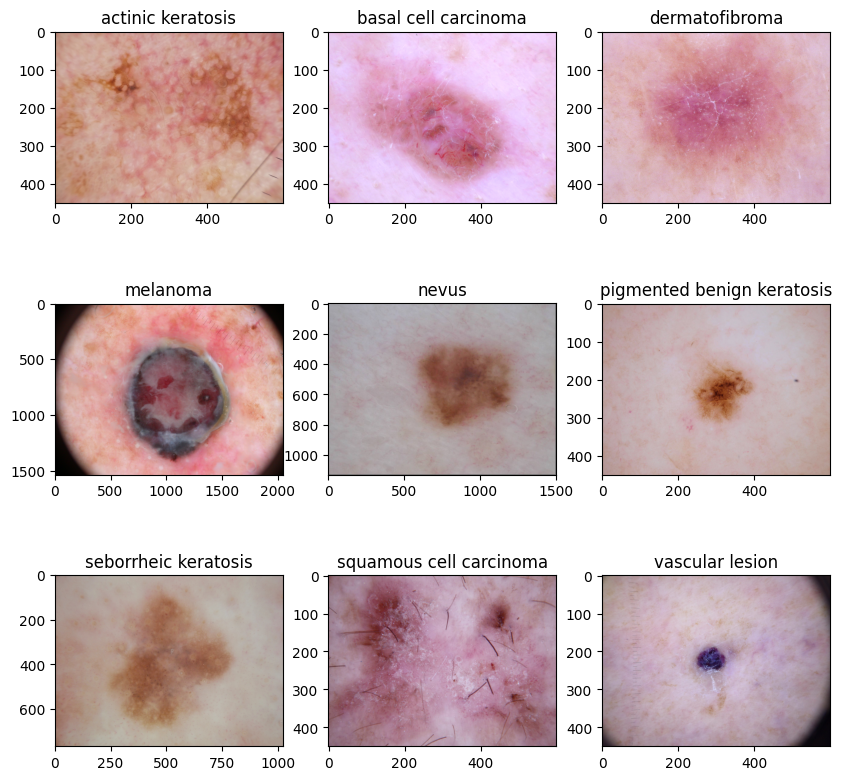

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
### Your code goes here
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 304s 1s/step - loss: 2.0562 - accuracy: 0.2254 - val_loss: 1.8434 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 5s 93ms/step - loss: 1.8699 - accuracy: 0.2790 - val_loss: 1.8978 - val_accuracy: 0.3669
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 1.7776 - accuracy: 0.3516 - val_loss: 1.6325 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 1.6548 - accuracy: 0.3923 - val_loss: 1.5805 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 5s 92ms/step - loss: 1.6807 - accuracy: 0.3850 - val_loss: 1.6595 - val_accuracy: 0.3982
Epoch 6/20
56/56 [==============================] - 5s 90ms/step - loss: 1.6690 - accuracy: 0.3728 - val_loss: 1.6720 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 5s 91ms/step - loss: 1.5825 - accuracy: 0.4208 - val_loss: 1.5749 - val_accuracy: 0.4273
Epoch 8/20
56

### Visualizing training results

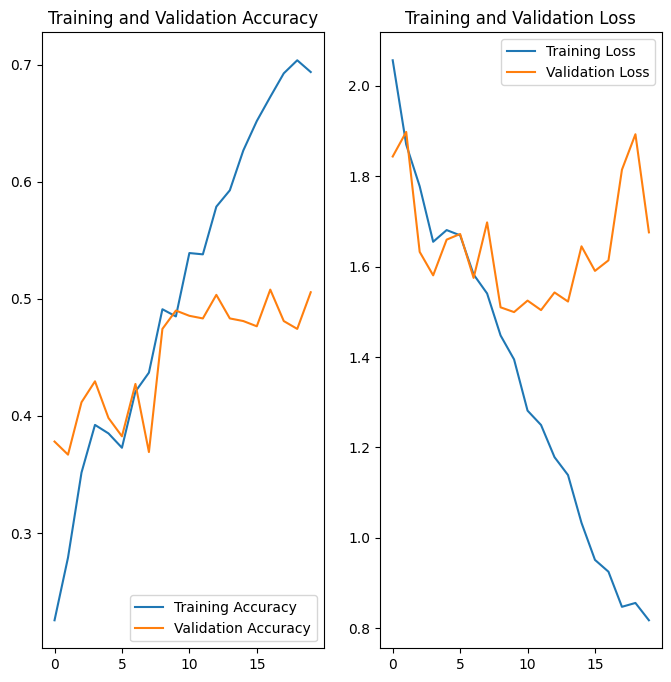

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

1. The accuracy of the model for the Training data set is at 69%. But the Validation accuracy is not in par with the training accuracy.
2. It is only at 50%. The validation loss as observed is very high. It may be because of overfitting.

In [26]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augment = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

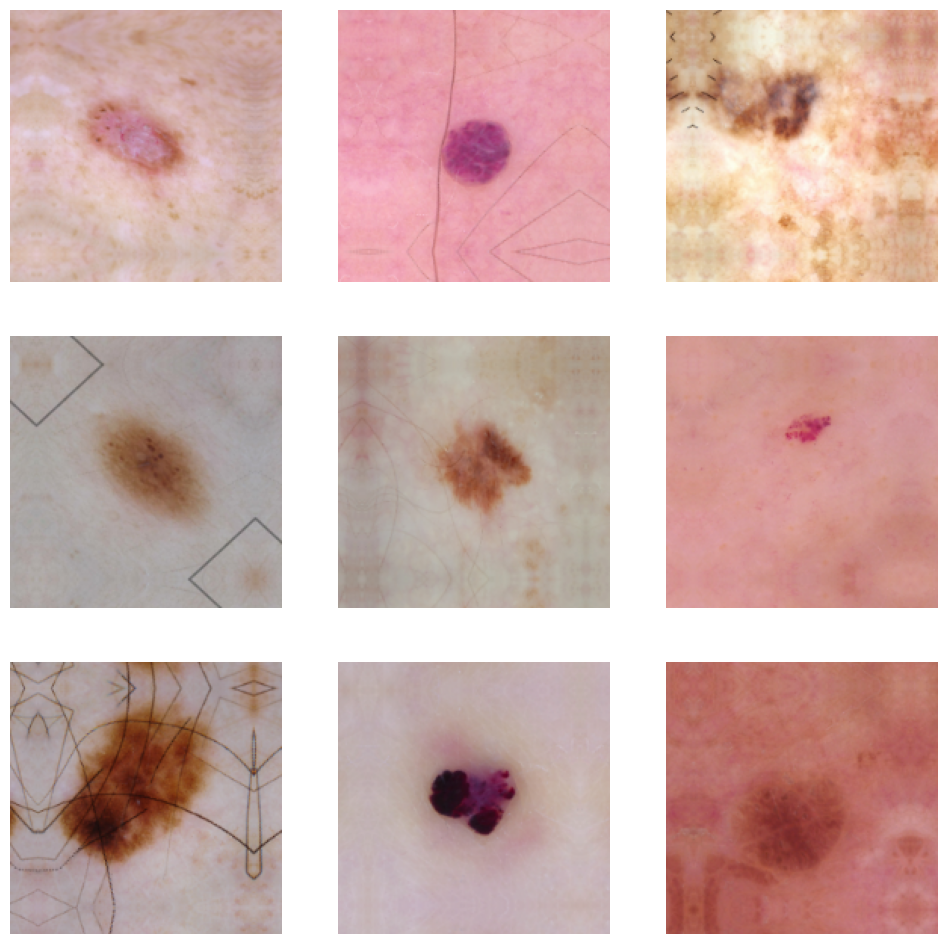

In [39]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint32"))
    #    plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))




### Compiling the model

In [43]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [44]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 109ms/step - loss: 2.0056 - accuracy: 0.2511 - val_loss: 1.8757 - val_accuracy: 0.2729
Epoch 2/20
56/56 [==============================] - 6s 102ms/step - loss: 1.8707 - accuracy: 0.2790 - val_loss: 1.8352 - val_accuracy: 0.2908
Epoch 3/20
56/56 [==============================] - 6s 99ms/step - loss: 1.7116 - accuracy: 0.3733 - val_loss: 1.8482 - val_accuracy: 0.3826
Epoch 4/20
56/56 [==============================] - 6s 105ms/step - loss: 1.7094 - accuracy: 0.3689 - val_loss: 1.6051 - val_accuracy: 0.4228
Epoch 5/20
56/56 [==============================] - 6s 101ms/step - loss: 1.6647 - accuracy: 0.3884 - val_loss: 1.6090 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 6s 100ms/step - loss: 1.6292 - accuracy: 0.3906 - val_loss: 1.6521 - val_accuracy: 0.4273
Epoch 7/20
56/56 [==============================] - 6s 100ms/step - loss: 1.6289 - accuracy: 0.4079 - val_loss: 1.6652 - val_accuracy: 0.3893
Epoch 

### Visualizing the results

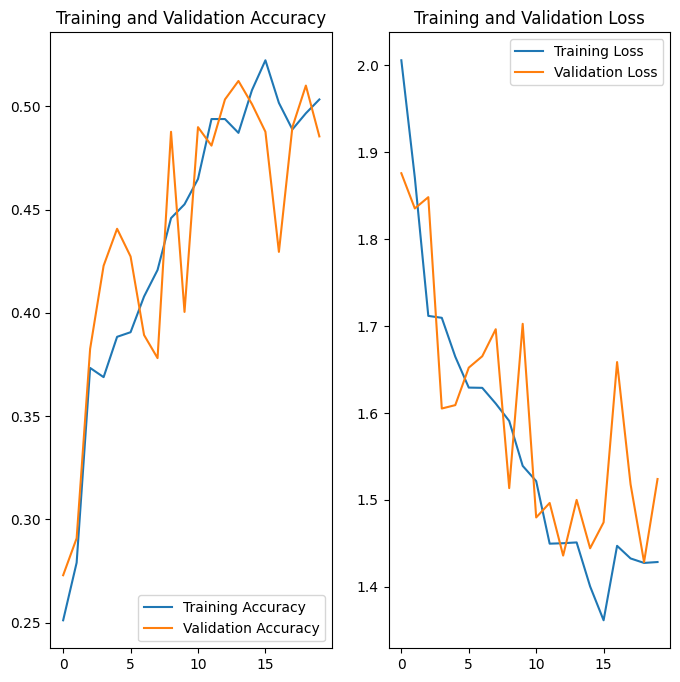

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Observations

1. The model accuracy for Train data set has dropped to nearly 50%.
2. The accuracy for the Validation set is at 48%.
3. This is a much better model compared to the previous model as there seems to be No Overfit with the training accuracy 50% and validation accuracy at 48%.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [46]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
1,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
2,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
3,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
4,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
...,...,...
2234,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2235,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2236,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2237,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion


In [47]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
1,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
2,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
3,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
4,gdrive/My Drive/melanoma_detection/Train/actin...,actinic keratosis
...,...,...
2234,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2235,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2236,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion
2237,gdrive/My Drive/melanoma_detection/Train/vascu...,vascular lesion


<BarContainer object of 9 artists>

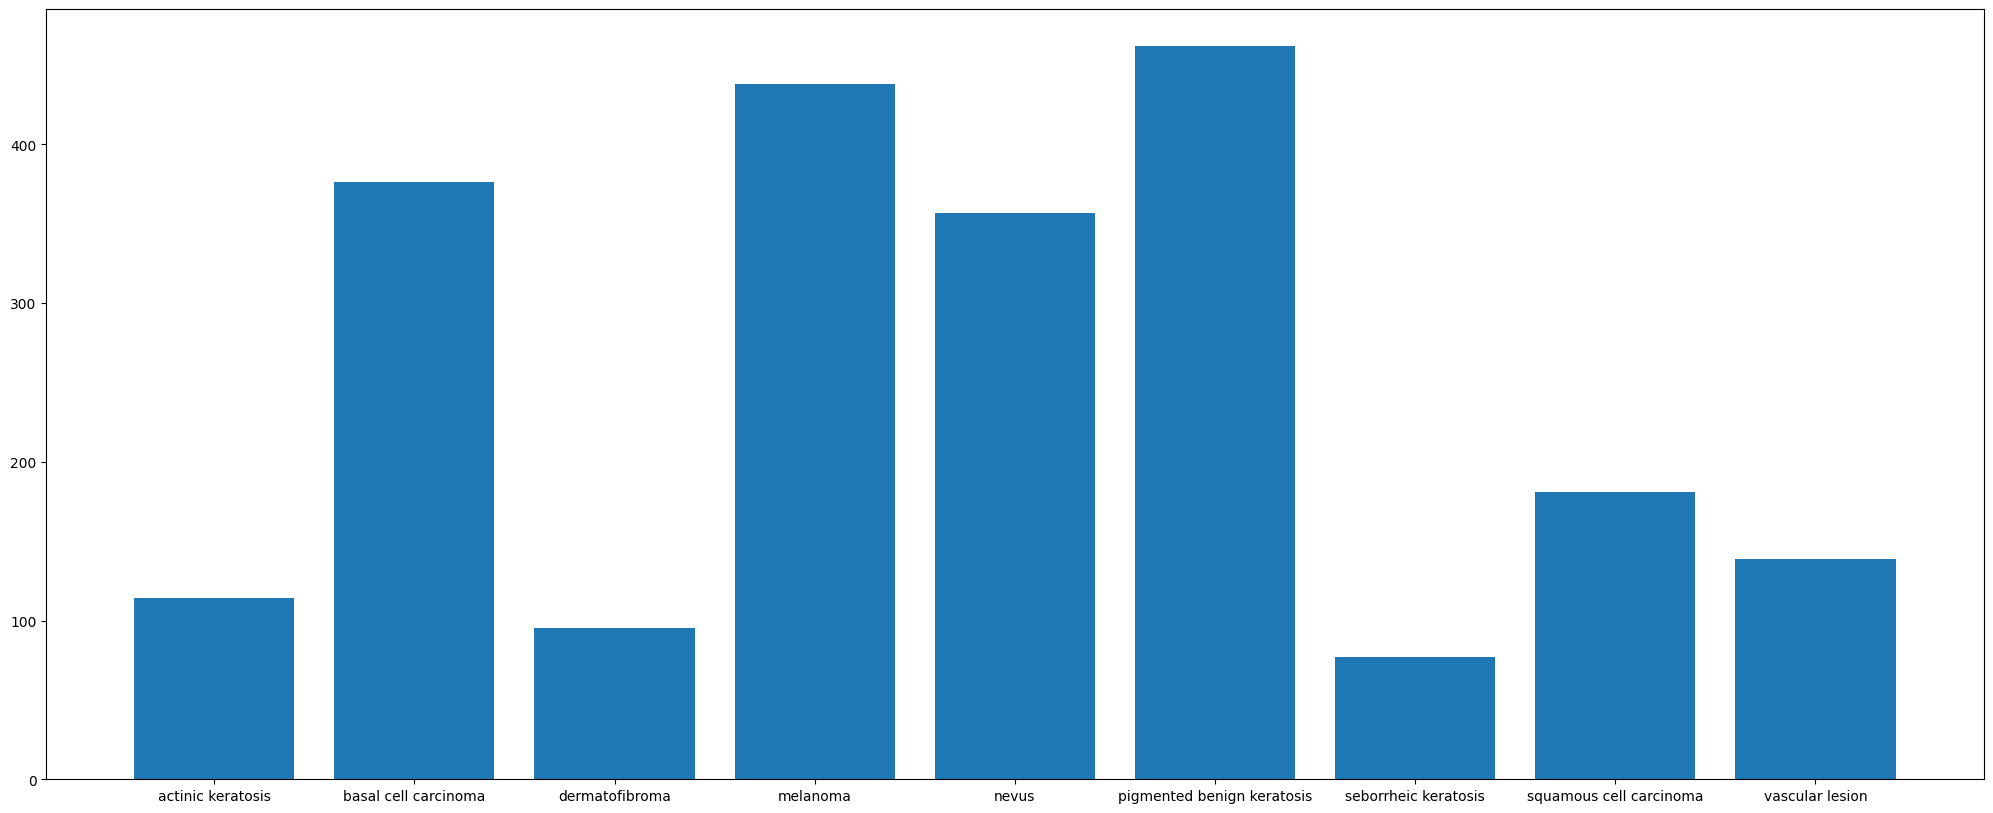

In [48]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples? - <font color = blue>*Seborrheic Keratosis*</font>
#### - Which classes dominate the data in terms proportionate number of samples? - <font color = blue>*Pigmented Benign Keratosis*</font>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [49]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [50]:
path_to_training_dataset="gdrive/My Drive/melanoma_detection/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79335AE5F9A0>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79335B5753F0>: 100%|██████████| 500/500 [00:19<00:00, 25.30 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79335BD4F7C0>: 100%|██████████| 500/500 [00:20<00:00, 24.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1936x1936 at 0x79335AE5FD90>: 100%|██████████| 500/500 [01:22<00:00,  6.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x793407B47A90>: 100%|██████████| 500/500 [01:29<00:00,  5.56 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7933F0041B10>: 100%|██████████| 500/500 [00:21<00:00, 23.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x79335AB04A90>: 100%|██████████| 500/500 [00:42<00:00, 11.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79335AB073A0>: 100%|██████████| 500/500 [00:19<00:00, 25.65 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/melanoma_detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79335B3C65C0>: 100%|██████████| 500/500 [00:19<00:00, 26.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [51]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [52]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0028163.jpg_d86b0ac6-7f7a-46b9-b6d0-8a8674e527de.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0024475.jpg_a6c3e584-b0e2-4283-9a6b-6a13c3ac01be.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_b5f86b57-3939-43ff-acaa-d0954c7a4e0e.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0031270.jpg_b6848f01-4ac2-4155-b4c9-41553ffbf752.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0033817.jpg_16e7fb11-6247-41fd-937b-ac26726ae707.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0027210.jpg_90f42c11-7eb1-446b-8de2-f8799f1146aa.jpg',
 'gdrive/My Drive/melanoma_detection/Train/vascular lesion/output/vascular lesion_original_ISI

In [53]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [55]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [56]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-56-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [57]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [58]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [59]:
data_dir_train="gdrive/My Drive/melanoma_detection/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [73]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [74]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [75]:
epochs =30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 44s 240ms/step - loss: 2.1063 - accuracy: 0.1712 - val_loss: 2.2190 - val_accuracy: 0.1759
Epoch 2/30
169/169 [==============================] - 42s 240ms/step - loss: 1.7576 - accuracy: 0.3296 - val_loss: 1.6710 - val_accuracy: 0.3586
Epoch 3/30
169/169 [==============================] - 40s 232ms/step - loss: 1.5754 - accuracy: 0.3937 - val_loss: 1.6640 - val_accuracy: 0.3274
Epoch 4/30
169/169 [==============================] - 40s 233ms/step - loss: 1.5360 - accuracy: 0.4108 - val_loss: 1.4748 - val_accuracy: 0.4499
Epoch 5/30
169/169 [==============================] - 40s 234ms/step - loss: 1.4003 - accuracy: 0.4688 - val_loss: 1.3828 - val_accuracy: 0.4714
Epoch 6/30
169/169 [==============================] - 38s 221ms/step - loss: 1.3007 - accuracy: 0.5210 - val_loss: 1.2631 - val_accuracy: 0.5375
Epoch 7/30
169/169 [==============================] - 40s 226ms/step - loss: 1.1749 - accuracy: 0.5749 - val_loss: 1.2628 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

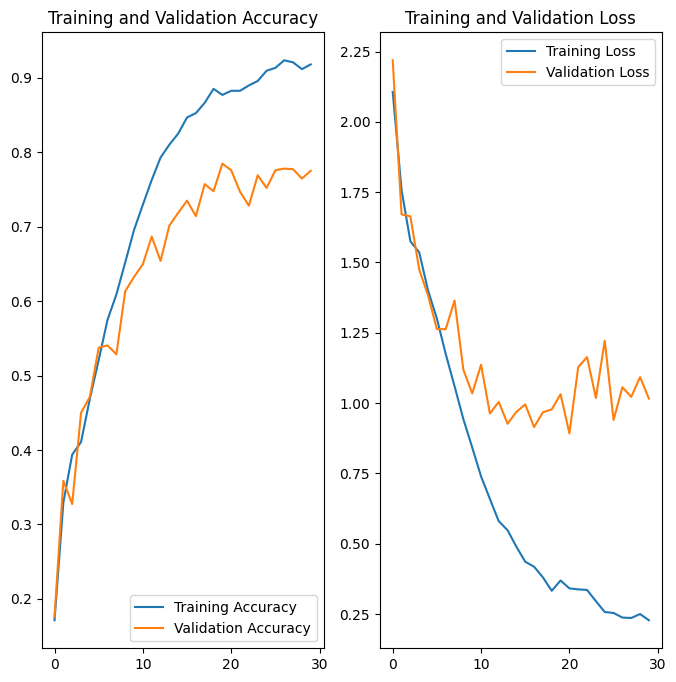

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?




##Observations

1. The training accuracy seems to be nearly ~92%.
2. The validation accuracy is nearly ~77%.
3. Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.
4. Much better models could be built or tried out using more epochs and more layers.